# Usage of the analytic binary decision model solution

## Introduction

In [1]:
include("MF_BDM_Analytic.jl");
using .BDMAnalytic;

In [2]:
using Plots, LaTeXStrings, Distributions
Plots.theme(:dao)

In this document we show how a user can get use analytic results for binary decision model in the *mean-field* setting. Each realisation of the model consists on $N$ economic agents all of which have a mean field interaction with one another. For each agent the *gain* in utility given that the agent switches decision from $S_i\to -S_i$ is given by $\mathcal{G} = -2S_i(F + J(1+\alpha) m)+2J(1+\alpha)/N$, where $F$ is the zeitgeist affecting all agents, $J$ is the interaction strength from one agent to another and $\alpha\in [0,1]$ is the strength of the altruism ($\alpha = 1$ being very altruistic, $0$ being entirely selfish).

We define the binary decision model (BDM) `struct` below.

In [3]:
N = 100; F = 0.0; J = 10.0;
BD1 = BDM(F = F, J = J, N = N);

We can then access certain field of the `struct`, for example the agent rationality parameter which can be specified.

In [4]:
BD1.β

1.0

Using the `prob(BDM, t, ic)` function we can then output the probability distributions for the model given the BDM at a time $t$ for an initial condition `ic`, below we do this for three different times. If we don't specify the starting condition, then is assumed that the system has an initial condition with $N/2$ up spins, or else setting `ic=m::Int64` will have an initial condition starting from $m$ up spins.

In [5]:
p1 = [prob(BD1, 0.1), prob(BD1, 1.0), prob(BD1, 4.0)];

One can then plot the probability distributions below, from just after the initial condition to towards the steady state.

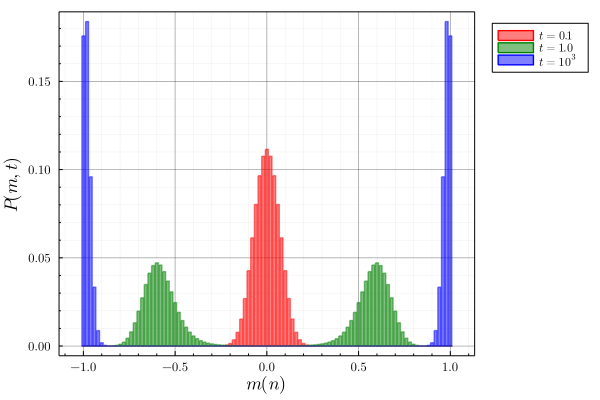

In [6]:
bar(p1, label = [L"t = 0.1" L"t = 1.0" L"t = 10^3"], color = ["red" "green" "blue"], linecolor = ["red" "green" "blue"], alpha = 0.5)
xlabel!(L"$m(n)$")
ylabel!(L"$P(m,t)$")

We can also check that the sum of the probabilities sums to 1 (or very close to 1 due to the numerical precision used) for each distribution. 

In [7]:
[sum(p1[i][2]) for i in 1:3]

3-element Vector{Double64}:
 0.9999999999999524
 0.9999999999999484
 0.99999999999995

Oftentimes, the initial condition of the number of right voting deciding is not exactly known and is itself a probability distribution. For example, a common initial condition is that each agent initially decides right with probability $p_0 = 0.5$; in which case there is an initial binomial distribution of initial decisions over the number of agents. We can specify initial distributions when specifying `ic` in `prob()`.

In [8]:
p2 = prob(BD1, 1.0, Binomial(N,0.5));

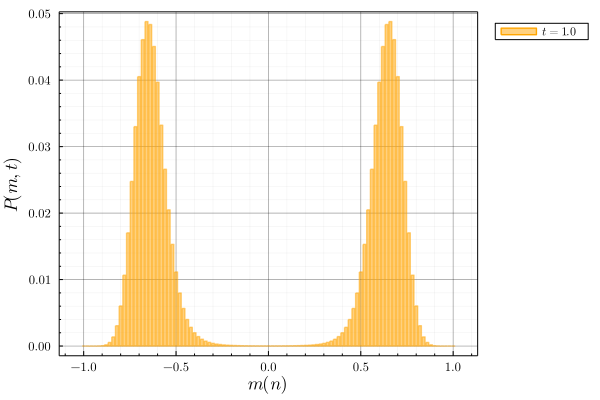

In [9]:
bar(p2, label = L"t = 1.0", color = :orange, linecolor = :orange, alpha = 0.5)
xlabel!(L"$m(n)$")
ylabel!(L"$P(m,t)$")

Again check the normalisation.

In [10]:
sum(p2[2])

0.9999999999999484

Finally, we can output the steady state distribution for an Ising model through `SSprob(AIM)`. No initial condition needs to be specified here since this is the *steady state* distribution reached as $t\to \infty$ and is hence independent of the initial condition. For $F=0$ we find that we obtain a bimodal steady-state distributions, where each mode corresponds to all agents either voting left or right. In the limit $N\to\infty$ this is known as symmetry breaking, since the time taken to transition between these modes of behaviour is exponentially large in $N$.

In [11]:
ps1 = SSprob(BD1);

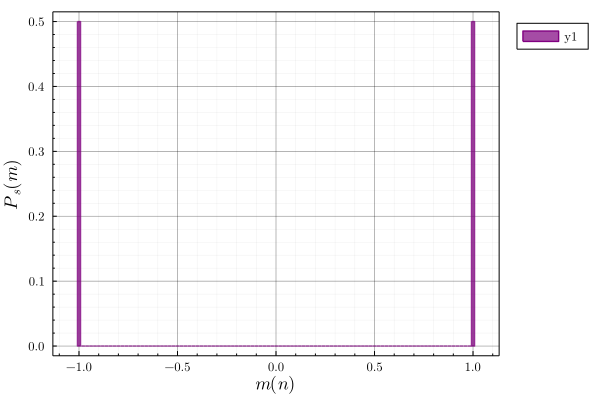

In [12]:
# bar(ps1)
bar(ps1, color = :purple, linecolor = :purple, alpha = 0.7)
xlabel!(L"$m(n)$")
ylabel!(L"$P_s(m)$")

And a final check of normalisation.

In [13]:
sum(ps1[2])

1.0

## Comparison to the SSA - Figure 1(c)

In [14]:
include("SSABinaryDecision.jl");
using .BinaryDecSSA;

In [15]:
SSA1 = BinDecMod(F = F, J = J);
Ens1 = Ensemble(BD = SSA1, e_size = 2500, τₘ = 10^3, Δτ = 0.1)

Ensemble
  BD: BinDecMod
  e_size: Int64 2500
  τₘ: Int64 1000
  Δτ: Float64 0.1
  sims: Tuple{Vector{Float64}, Vector{Array{Real, N} where N}}


In [16]:
EnsProb(Ens1,10000)

(range(-1.0, stop=1.0, length=101), [0.5032, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4968])

In [17]:
pFC = [EnsProb(Ens1,2), EnsProb(Ens1,11), EnsProb(Ens1,41)];

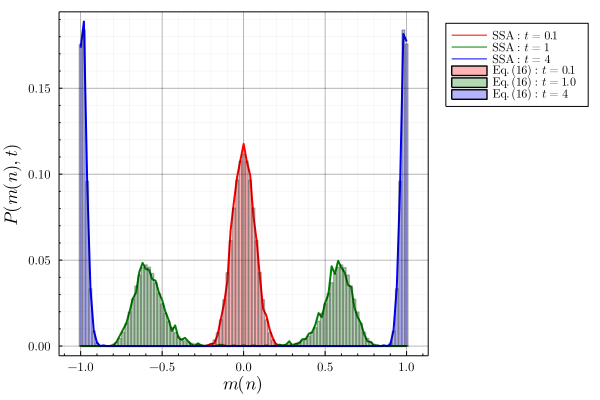

In [18]:
plot(pFC[1][1], [pFC[1][2], pFC[2][2], pFC[3][2]], lw = 2.0, label = [L"\mathrm{SSA:} t = 0.1"  L"\mathrm{SSA:}  t = 1"  L"\mathrm{SSA:} t = 4"], color = ["red" "green" "blue"])
bar!(p1, label = [L"\mathrm{Eq. (16):} t = 0.1"  L"\mathrm{Eq. (16):}  t = 1.0"  L"\mathrm{Eq. (16):} t = 4"], color = ["red" "green" "blue"], alpha = 0.3)
xlabel!(L"$m(n)$")
ylabel!(L"$P\,(m(n),t)$")

In [19]:
# plot(pFC[1][1], [pFC[1][2], pFC[2][2], pFC[3][2]], lw = 2.0, label = [L"\mathrm{SSA:} t = 0.1"  L"\mathrm{SSA:}  t = 1"  L"\mathrm{SSA:} t = 4"], color = ["red" "green" "blue"])
# bar!(p1, label = [L"\mathrm{Eq. (16):} t = 0.1"  L"\mathrm{Eq. (16):}  t = 1.0"  L"\mathrm{Eq. (16):} t = 4"], color = ["red" "green" "blue"], alpha = 0.3)
# xlabel!(L"$m(n)$")
# ylabel!(L"$P\,(m(n),t)$")
# savefig("/home/s1402978/Desktop/Internship/Exact-Ising-Paper/Figs/fig1/SSA_vs_analytic.svg")

## Pseudospectra

The results shown for the time-dependent solution $P(n,t)$ are very much what we expect - for $F=0, J\geq 2/\beta$ and a symmetric initial condition about $N/2$ we get normalised probability distributions that give symmetry breaking behaviour (one mode of thought eventually dominates the whole population). However, this is all done with computational calculation of the eigenvalues - which we physically know should be real and negative aside from the single $\lambda_1=0$ eigenvalue.

We use `eigvals` from the `LinearAlgebra` package of Julia to calculate the eigenvalues computationally, a procedure that returns some complex eigenvalues. One can use these in the analytical solution to very good approximation (see comparison to the SSA above), although formally the result is not exact. This phenomenon is known as a *pseudospetrum*. It arises due to the eigenvalue calculation being very sensitive to pertubations caused by numerical imprecision. We plot the eigenspectrum of the example here below. For more information see https://opus.lib.uts.edu.au/bitstream/10453/136233/1/1701.02522.pdf.

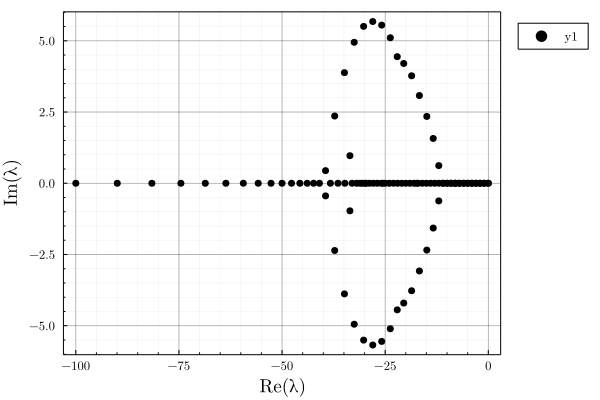

In [20]:
scatter(BD1.λ, color = :black)
xlabel!("Re(λ)")
ylabel!("Im(λ)")

## Figure 2 - lock-ins

In [21]:
BDL = BDM(F = 0.1, J = 5.0, N = 50);
pL = [prob(BDL, 0.1), prob(BDL, 1.0), prob(BDL, 10.0), prob(BDL, 10e10)];
psL = SSprob(BDL);

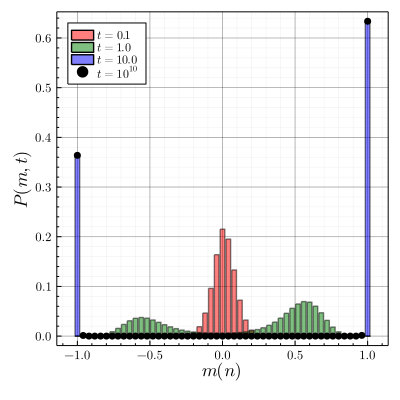

In [22]:
bar(pL[1:3], label = [L"t = 0.1"  L"t = 1.0"  L"t = 10.0" L"t = 10^{10}"], color = ["red" "green" "blue"], alpha = 0.5, legend = :topleft)
scatter!(pL[4], color = :black, label = L"t = 10^{10}")
plot!(size = (400,400))
xlabel!(L"$m(n)$")
ylabel!(L"$P\,(m,t)$")

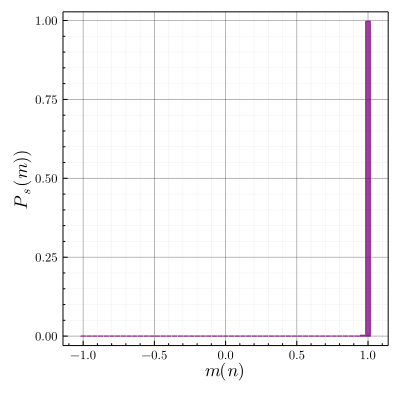

In [23]:
bar(psL, legend = :none, color = :purple, linecolor = :purple, alpha = 0.7)
plot!(size = (400,400))
xlabel!(L"$m(n)$")
ylabel!(L"$P_s\,(m))$")

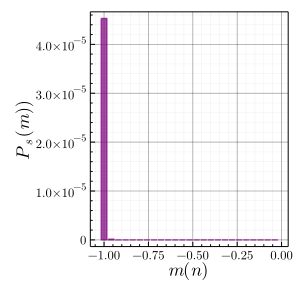

In [24]:
bar(psL[1][1:25], psL[2][1:25], legend = :none, color = :purple, linecolor = :purple, alpha = 0.7)
plot!(size = (300,300))
xlabel!(L"$m(n)$")
ylabel!(L"$P_s\,(m))$")

In [25]:
SSAL = BinDecMod(F = 0.1, J = 5.0, N = 50);
EnsL = Ensemble(BD = SSAL, e_size = 100, τₘ = 10, Δτ = 0.1)

Ensemble
  BD: BinDecMod
  e_size: Int64 100
  τₘ: Int64 10
  Δτ: Float64 0.1
  sims: Tuple{Vector{Float64}, Vector{Array{Real, N} where N}}


In [26]:
EnsL.sims[2][1];

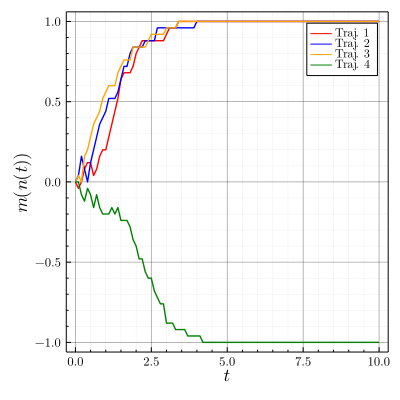

In [27]:
plot(EnsL.sims[1],EnsL.sims[2][1:4], color = [:red :blue :orange :green], legend = :topright, label = [L"\mathrm{Traj.}\;1" L"\mathrm{Traj.}\;2" L"\mathrm{Traj.}\;3" L"\mathrm{Traj.}\;4"])
plot!(size = (400,400))
xlabel!(L"$t$")
ylabel!(L"$m(n(t))$")

## Figure 3 - metastability

In [28]:
BDmeta = BDM(F = 0.025, J = 1.5, N = 50);
pmeta = [prob(BDmeta, 0.1), prob(BDmeta, 1.0), prob(BDmeta, 1000.0)];
psmeta = SSprob(BDmeta);

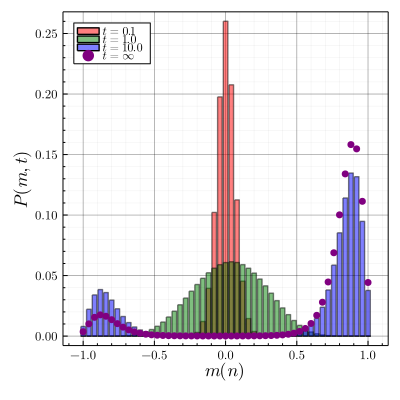

In [29]:
bar(pmeta, label = [L"t = 0.1"  L"t = 1.0"  L"t = 10.0" L"t = 10^{10}"], color = ["red" "green" "blue"], alpha = 0.5, legend = :topleft)
scatter!(psmeta, color = :purple, label = L"t = \infty")
plot!(size = (400,400))
xlabel!(L"$m(n)$")
ylabel!(L"$P\,(m,t)$")

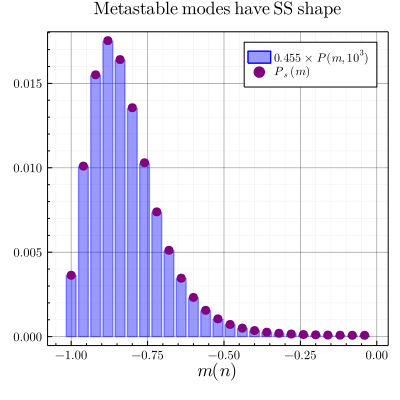

In [30]:
bar(pmeta[3][1][1:25],pmeta[3][2][1:25]*0.455, color = :blue, linecolor = :blue, alpha = 0.4, legend = :topright, label = L"0.455\times P\;(m,10^3)")
scatter!(psmeta[1][1:25],psmeta[2][1:25], color = :purple, markersize = 5, label = L"P_s\;(m)")
plot!(size = (400,400))
xlabel!(L"$m(n)$")
title!(L"\mathrm{Metastable}\;\mathrm{modes}\;\mathrm{have}\;\mathrm{SS}\;\mathrm{shape}")

## Fixation times

Here we calculate the probability of being fixated at $n_+$ given one starts at some value of $n_-<n<n_+$.

In [31]:
Nm = 50;
as = BDmeta.As[1:Nm]; # runs from a[1]->a[N]
bs = BDmeta.Bs[1:Nm]; # runs from b[0]->b[N-1]
asrev = reverse(as);
bsrev = reverse(bs);

In [32]:
nᵤ = floor(Int,(psmeta[1][argmin(psmeta[2])] + 1)*Nm/2) + 1; # +1 for the index
n₋ = floor(Int,(psmeta[1][argmax(psmeta[2][1:25])] + 1)*Nm/2) + 1;
n₊ = floor(Int,(psmeta[1][argmax(psmeta[2])] + 1)*Nm/2) + 1;

Print the indices of the critical values of the probability distribution.

In [33]:
print(n₋,"\n",nᵤ,"\n",n₊) # indices

4
25
48

In [34]:
ϕ₋ = (1 + sum([prod([bs[j]/as[j+1] for j in n₋:k]) for k in n₋:n₊-2]))^-1 # prob of fixation at N given starting i=1.

0.0012439349321939268

In [35]:
ϕᵢ = [ϕ₋*(1 + sum([prod([bs[j]/as[j+1] for j in n₋:k]) for k in n₋:i-2])) for i in n₋+2:n₊-1];
prepend!(ϕᵢ, ϕ₋);

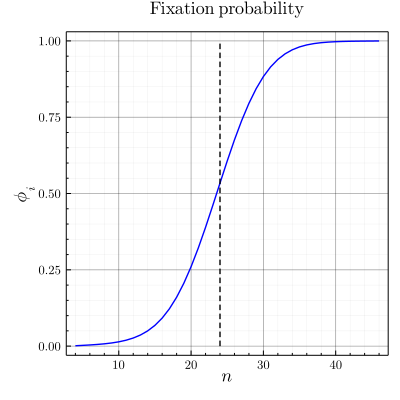

In [36]:
plot(n₋:n₊-2,ϕᵢ, legend = :none, color = :blue)
plot!([nᵤ-1,nᵤ-1],[0,1], linestyle = :dash, linecolor = :black) # minus 1 to conv index to value
plot!(size = (400,400))
xlabel!(L"$n$")
ylabel!(L"\phi_i")
title!(L"\mathrm{Fixation}\;\mathrm{probability}")

In [37]:
ϕᵣ = ϕᵢ[nᵤ-n₋]

0.5341870363988914

## Mean first passage times

We now calculate the mean first passage times to hit $n_u$ given one initially starts at some $n$. For $n<n_u$ and $n>n_u$ these must be considered separately.

In [38]:
η₁ = -1/as[1];
ηᵢ = -[sum([(1/as[j])*prod(bs[j:i-1])/prod(as[j+1:i]) for j in 1:i]) for i in 2:nᵤ-1]
prepend!(ηᵢ,η₁);
τ₋ = -[sum(ηᵢ[i:nᵤ-1]) for i in 1:nᵤ-1];

In [39]:
rη₁ = -1/bsrev[1];
rηᵢ = -[sum([(1/bsrev[j])*prod(asrev[j:i-1])/prod(bsrev[j+1:i]) for j in 1:i]) for i in 2:Nm-nᵤ+1]
prepend!(rηᵢ,rη₁);
τ₊ = reverse(-[sum(rηᵢ[i:Nm-nᵤ+1]) for i in 1:Nm-nᵤ+1]);

In [40]:
mvals = psmeta[1];
τs = vcat(τ₋,0.0,τ₊);

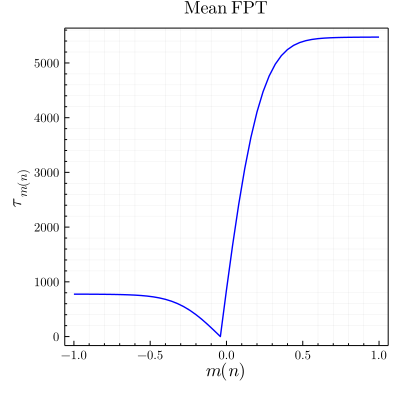

In [41]:
plot(mvals,τs, legend = :none, linecolor = :blue, grid = :none)
plot!(size = (400,400))
xlabel!(L"$m(n)$")
ylabel!(L"\tau_{m(n)}")
title!(L"\mathrm{Mean}\;\mathrm{FPT}")

We can now use the calculations of the mean first passage times to hit $n_u$ in order to calculate the smallest eigenvalue related to the metastable regime. Note that the inverse of this eigenvalue gives us an approximation of the time taken to reach steady-state.

In [42]:
using LinearAlgebra

In [43]:
ρₗ = psmeta[2][1:nᵤ-1]/sum(psmeta[2][1:nᵤ-1]);
τlr = dot(τ₋,ρₗ);
ρᵣ = psmeta[2][nᵤ+1:end]/sum(psmeta[2][nᵤ+1:end]);
τrl = dot(τ₊,ρᵣ)

5464.592185902686

In [44]:
λ₂ = (ϕᵣ/τlr)+((1-ϕᵣ)/τrl)

0.0007813747843490914

In [45]:
1/λ₂

1279.795585972268

In [46]:
-1/BDmeta.λ[2]

1288.7611407675834 + 0.0im